In [1]:
import pandas as pd

In [5]:
file_insurance_path='C:/Users/91828/Downloads/archive (7)/insurance.csv'

In [9]:
#Dataframe
df=pd.read_csv(file_insurance_path)

In [35]:
#Basic information
df_info=df.info()
print(df.isnull().sum()) #to check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [33]:
''' This dataset has 1337 rows and 7 columns and no null values'''

' This dataset has 1337 rows and 7 columns and no null values'

In [19]:
df_head=df.head() #shows first 5 rows 
df_head

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df_description=df.describe(include='all') # quick stats: mean, median, mode
df_description

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [25]:
df.shape, df.columns, df.dtypes

((1338, 7),
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'),
 age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object)

In [29]:
'''Charges is the target variable for this dataset. It is a continuous variable. Features are : Numerical:- age, bmi, children and Categorical:- sex, smoker and region.
We can predict insurance cost using these features.'''

'Charges is the target variable for this dataset. It is a continuous variable. Features are : Numerical:- age, bmi, children and Categorical:- sex, smoker and region.'

In [39]:
#Data preprocessing: Converting 'sex' column- femle=0, male=1
df['sex']=df['sex'].map({'female':0,'male':1})
#Converting 'smoker' no=0, yes=1
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [41]:
#Turining categorical data for teh region column into separate columns
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [45]:
'''pd.get_dummies() is used to convert categorical variables into numeric format by creating one binary column for each category. However, in linear regression, keeping all dummy variables can lead to multicollinearity which is  a situation where one column can be perfectly predicted from the others.
To avoid this, we use drop_first=True, which drops the first category and uses it as a baseline. This prevents redundancy, ensures the model is well-defined, and maintains interpretability without losing any information.'''

'pd.get_dummies() is used to convert categorical variables into numeric format by creating one binary column for each category. However, in linear regression, keeping all dummy variables can lead to multicollinearity which is  a situation where one column can be perfectly predicted from the others.\nTo avoid this, we use drop_first=True, which drops the first category and uses it as a baseline. This prevents redundancy, ensures the model is well-defined, and maintains interpretability without losing any information.'

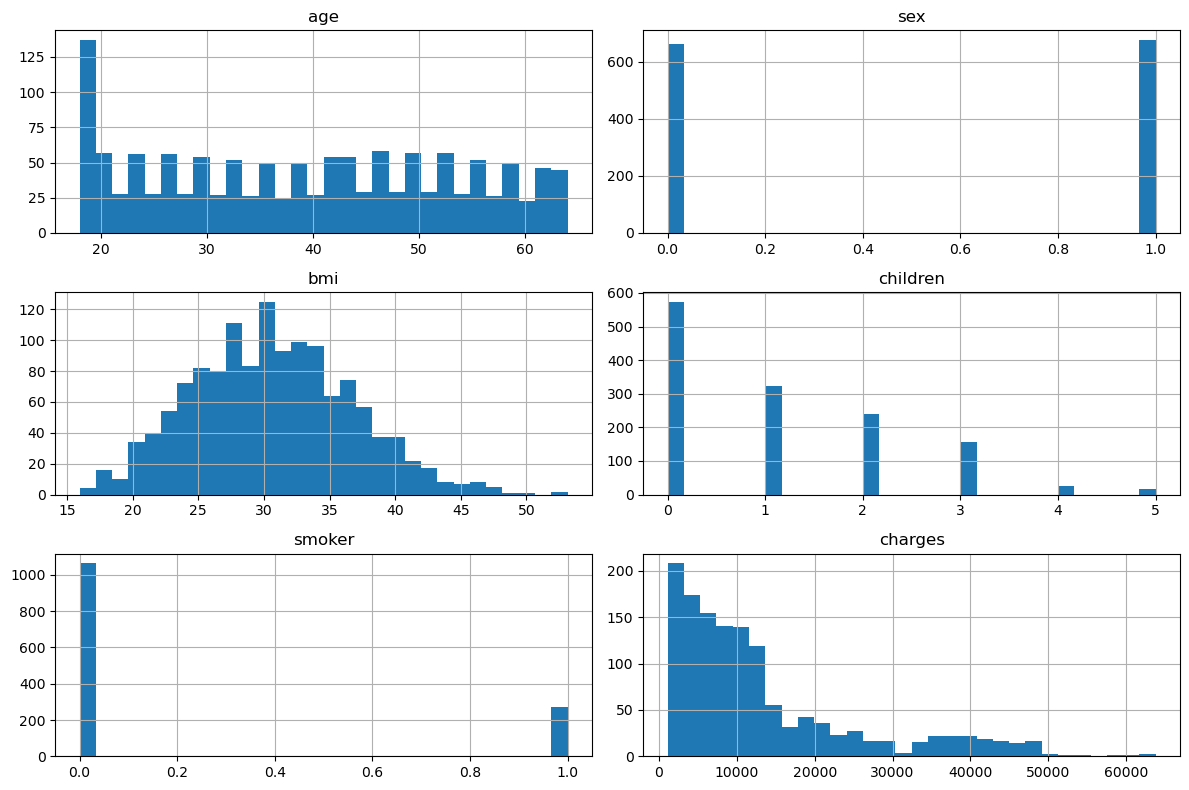

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [50]:
''' Age: Distribution looks uniform. Roughly equal numbe rof people between age 20 to 60+
        Slight spike near 15~18, may be dependents.
    Sex: Encoded as 0(female) and 1(male).Gender ratio is balanced(almost equal amounts of males and females)
    BMI(Body mass index): Normal distribution. People of age ~25 to 35 have higher BMI.
    Children: Mostly people have 0 to 2 children.
    Smoker: Encoded as 0(non smoker and 1(smoker).Non smokers are higher than smokers. smokers may be less in number, but may have a higher effect on charges.
    Charges: Right skewed. Most people pay under $15000, but some pay more than $50000.'''

' Age: Distribution looks uniform. Roughly equal numbe rof people between age 20 to 60+\n        Slight spike near 15~18, may be dependents.\n    Sex: Encoded as 0(female) and 1(male).Gender ratio is balanced(almost equal amounts of males and females)\n    BMI(Body mass index): Normal distribution. People of age ~25 to 35 have higher BMI.\n    Children: Mostly people have 0 to 2 children.\n    Smoker: Encoded as 0(non smoker and 1(smoker).Non smokers are higher than smokers. smokers may be less in number, but may have a higher effect on charges.\n    Charges: Right skewed. Most people pay under $15000, but some pay more than $50000.'

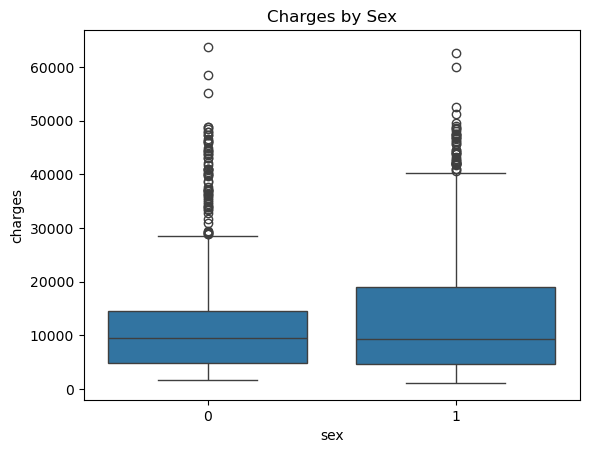

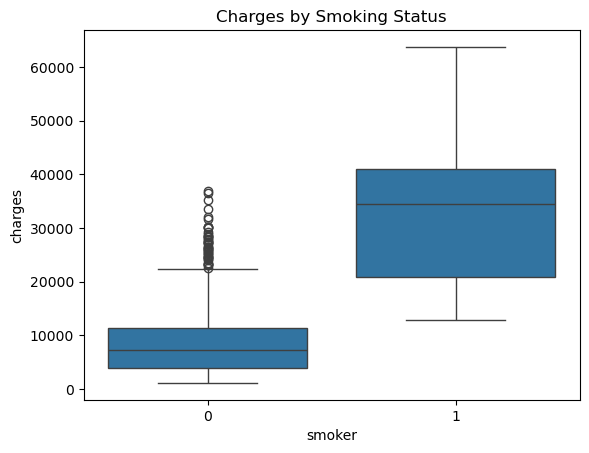

In [54]:
#Boxplots
# Charges by sex
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Sex")
plt.show()

# Charges by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()

In [56]:
'''BOXPLOTS: 
Charges by sex: The median charges are almost same for both male and female with a sliightly higher spread for males. Both groups have outliers. 
Charges by smoking: Non smokers pay less insurance charges than males with a visble number of outliers. These may be due to some other factors. The entire boxplot for non smokers is above $20000.
BEing a smoker raises the insurance charges.'''

'BOXPLOTS: \nCharges by sex: The median charges are almost same for both male and female with a sliightly higher spread for males. Both groups have outliers. \nCharges by smoking: Non smokers pay less insurance charges than males with a visble number of outliers. These may be due to some other factors. The entire boxplot for non smokers is above $20000.\nBEing a smoker raises the insurance charges.'

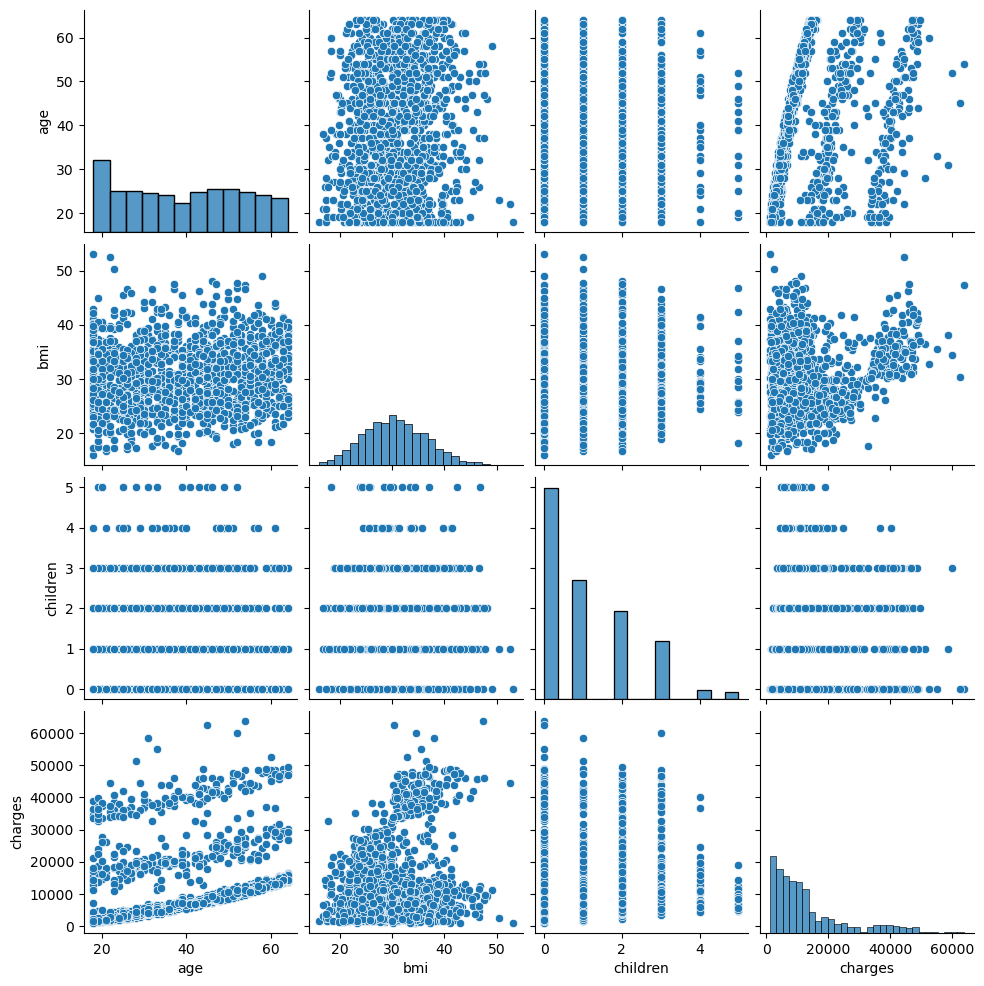

In [58]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()


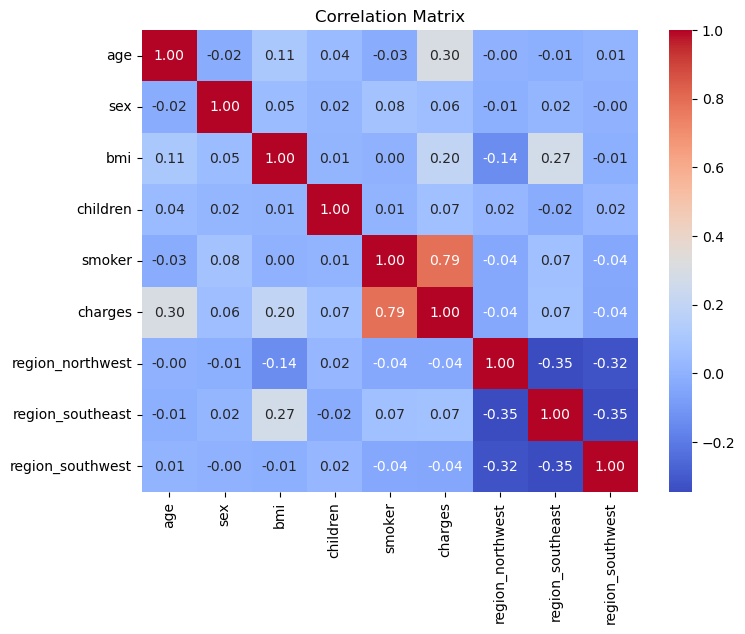

In [60]:
# Show correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [66]:
''' This heatmap shows that there is a strong positive correlation between smoker and charges.. smokers pay much more charges than others.
    Age has moderate positive.Older people pay more.
    Sex: Weak positive. Gender doesnot affect the charges.
    BMI: Moderate positive. Higher BMI may lead to higher charges.
    Children: Weak positive. Number of children doesnot affect the charges.
    '''

' This heatmap shows that there is a strong positive correlation between smoker and charges.. smokers pay much more charges than others.\n    Age has moderate positive.Older people pay more.\n    Sex: Weak positive. Gender doesnot affect the charges.\n    BMI: Moderate positive. Higher BMI may lead to higher charges.\n    Children: Weak positive. Number of children doesnot affect the charges.\n    '

In [68]:
#Linear regression
X=df.drop('charges', axis=1) #dropping target column
y=df['charges'] #target column


In [70]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [72]:
#Train linear regression model
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 4181.1944737536505
Mean Squared Error (MSE): 33596915.851361446
Root Mean Squared Error (RMSE): 5796.284659276272
R² Score: 0.7835929767120724


In [80]:
''' MAE: Its is approx $4181. This means that models predictions are off by 4181 dollars. For exmaple, if the original insurance is 12000, model will predict it something like, 7800 or 16000 that is approx 4000 dollars away from teh actual
 MSE: This value s very large and difficult to interpret. Therefore, we will take a look at RMSE.
 RMSE: 5796.28, model is on average, off by this value. Smaller the RMSe, better the value.
 R-squared: Model is able to explain 78.36% of teh reasons on why insurance is different for different people.R-squared=1, is teh perfect model.
 In nutshell,R² score of 78% is strong.MAE and RMSE are quite acceptable for a healthcare-related dataset.'''

' MAE: Its is approx $4181. This means that models predictions are off by 4181 dollars. For exmaple, if the original insurance is 12000, model will predict it something like, 7800 or 16000 that is approx 4000 dollars away from teh actual\n MSE: This value s very large and difficult to interpret. Therefore, we will take a look at RMSE.\n RMSE: 5796.28, model is on average, off by this value. Smaller the RMSe, better the value.\n R-squared: Model is able to explain 78.36% of teh reasons on why insurance is different for different people.R-squared=1, is teh perfect model.\n In nutshell,R² score of 78% is strong.MAE and RMSE are quite acceptable for a healthcare-related dataset.'

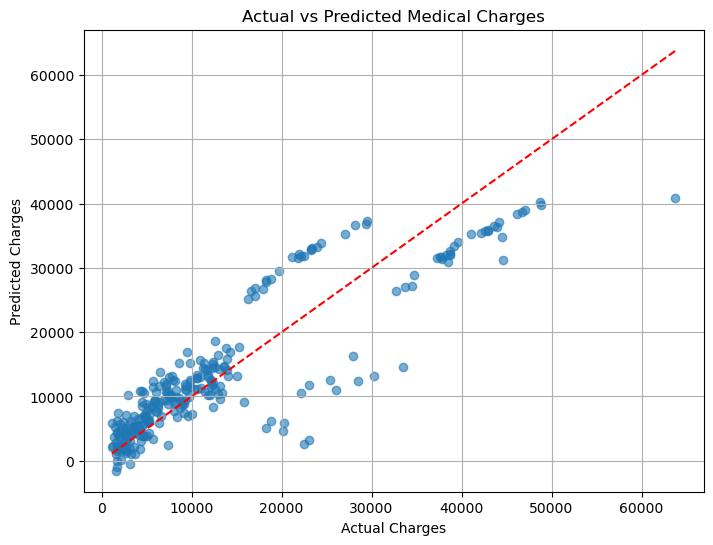

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # perfect prediction line
plt.grid(True)
plt.show()


In [84]:
'''dots close to red lines mean that the model has predicted wellf or those cases. A lot of people have lower medical charges and model has predicted those fairly well. On the right side, there are fewer data points, but predictions are off by a lot, model struggled in this area.'''

'dots close to red lines mean that the model has predicted wellf or those cases. A lot of people have lower medical charges and model has predicted those fairly well. On the right side, there are fewer data points, but predictions are off by a lot, model struggled in this area.'

In [90]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df

,Feature,Coefficient
4,smoker,23651.128856
3,children,425.278784
2,bmi,337.092552
0,age,256.975706
1,sex,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


In [92]:
'''Smoker has teh highest affect. It adds $23651 to the predicted changes. Therefore, smoking is the strongest factor in detemining teh cost. Sex has teh lowest affect. The dropped region is teh most expensive. '''

'Smoker has teh highest affect. It adds $23651 to the predicted changes. Therefore, smoking is the strongest factor in detemining teh cost. Sex has teh lowest affect. The dropped region is teh most expensive. '